**Regression on Sydney Dataset**

Dataset from https://www.kaggle.com/shree1992/housedata 

The goal is to predict the ’price’ column.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

housing_df = pd.read_csv('/content/sample_data/data.csv')

#Check for the datatypes of the columns
housing_df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

Determinining which features are continuous vs. categorical and dropping rows without a valid sales price.

In [ ]:
continuous_features = housing_df.select_dtypes(include='number').columns.tolist()
categorical_features = housing_df.select_dtypes(exclude='number').columns.tolist()
updated_categorical_features = categorical_features
updated_categorical_features.remove('date')

# determining continuous and categorical features
print("Continuous Features: ")
for i in continuous_features:
  print(i)
print("\nCategorical Features: ")
for j in updated_categorical_features:
  print(j)

# dropping rows with valid sales price
updated_housing_df = housing_df
updated_housing_df.drop('date', axis=1, inplace=True)
updated_housing_df.drop(updated_housing_df[updated_housing_df['price'] == 0].index)

Continuous Features: 
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
sqft_above
sqft_basement
yr_built
yr_renovated

Categorical Features: 
street
city
statezip
country


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


Visualizing the univariate distribution of each continuous variable, and the distribution of the target.

In [ ]:
# storing continuous_features list in a separate list so that it can be retained each time the code is executed
updated_continuous_features = continuous_features
updated_continuous_features.remove('price')

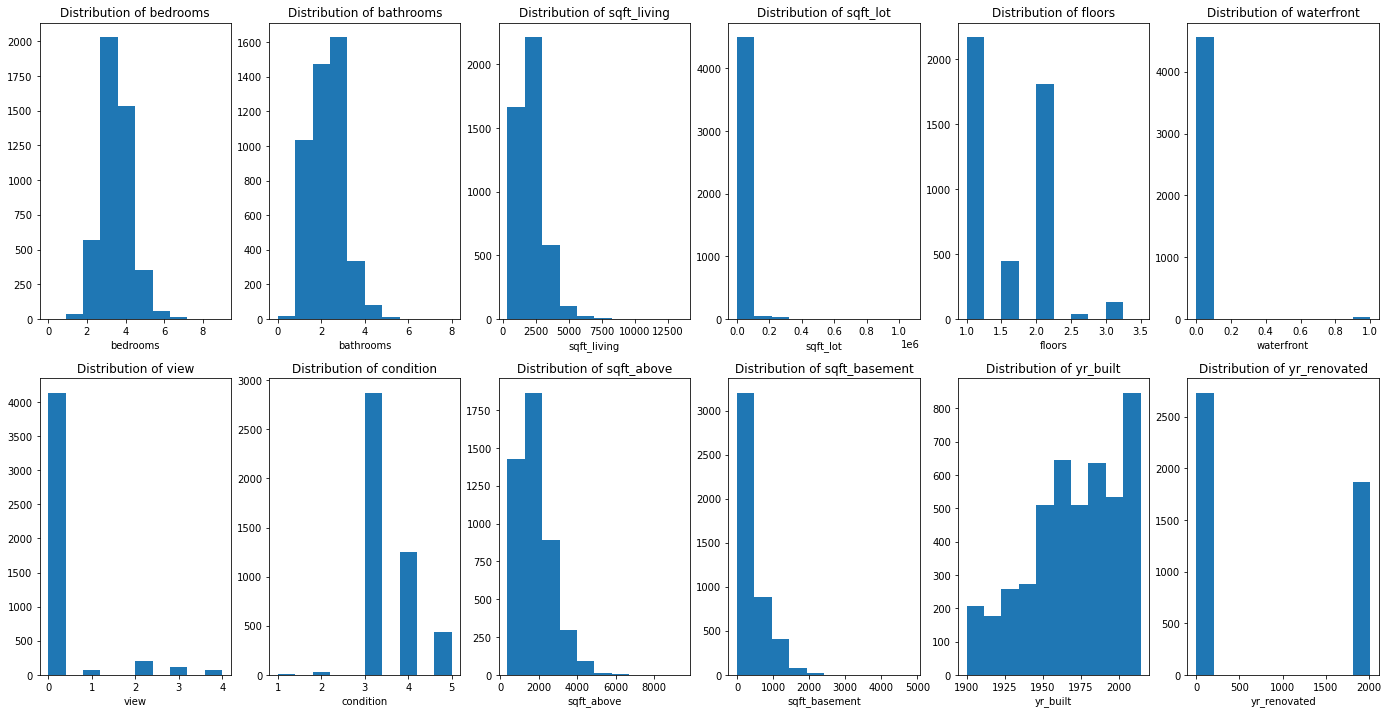

In [ ]:
fig, ax = plt.subplots(2,int(len(updated_continuous_features)/2), figsize=(24,12))
j = 0
k = 0
# loop to plot each feature dynamically
for i in range(len(continuous_features)):
  if(i == (len(continuous_features)/2)):
    j = 0
    k = 1
  # plotting continuous features
  ax[k,j].hist(updated_housing_df[updated_continuous_features[i]])
  ax[k,j].set_xlabel(updated_continuous_features[i])
  ax[k,j].set_title("Distribution of " + updated_continuous_features[i])
  j = j + 1

What did we observe?

1. As the years progress, there is an increase in the number of houses built.

2. The yr_renovated feature has major chunk of data with values as '0' which means they have never been renovated since built. This feature might affect the accuracy of the model negatively. To solve this issue, we create a new feature 'yr_renewed' which will take the value of yr_built if the yr_renovated is 0 in place of renovation year. Thus, by doing this we will get a continuous distribution of yr_renewed and we can drop yr_renovated.

In [ ]:
print(len(updated_housing_df[(updated_housing_df['yr_renovated'] == 0 )]))
yr_renewed = []

# assigning yr_built and yr_renovated values to new feature
for key, value in updated_housing_df['yr_renovated'].iteritems():
  if(updated_housing_df['yr_renovated'][key] == 0):
    yr_renewed.append(updated_housing_df['yr_built'][key])
  else:
    yr_renewed.append(updated_housing_df['yr_renovated'][key])
updated_housing_df['yr_renewed'] = yr_renewed
updated_continuous_features.remove('yr_renovated')
updated_continuous_features.append('yr_renewed')

2735


Text(0.5, 0, 'price')

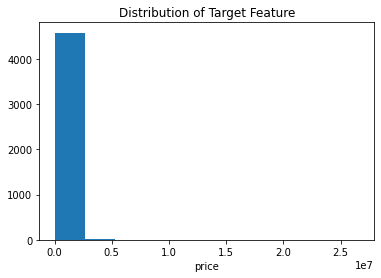

In [ ]:
# plotting target feature
plt.hist(updated_housing_df['price'])
plt.title('Distribution of Target Feature')
plt.xlabel('price')

**What do we notice?**

We observe that most of the data is concentrated towards the left and there is a possibility of outliers. We need to do the Outlier treatment and check if the target variable shows represents some distribution or not.

In [ ]:
#Define a function Outliers_removal to remove the Outliers 
#and then pass the target variable and plot the graph after outlier treatment.
def Outliers_removal(dataset, column):
  IQR = dataset[column].quantile(0.75) - dataset[column].quantile(0.25)

  Lower_bound = dataset[column].quantile(0.25) - 1.5 * IQR
  Upper_bound = dataset[column].quantile(0.75) + 1.5 * IQR

  return dataset[(dataset[column] < Upper_bound)]

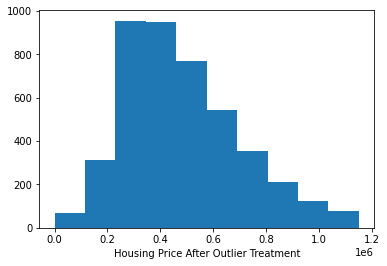

In [ ]:
updated_housing_df=Outliers_removal(updated_housing_df,"price")
plt.hist(updated_housing_df["price"])
plt.xlabel("Housing Price After Outlier Treatment")
plt.show()

In [ ]:
# observing the unique values in each category
updated_housing_df['bedrooms'].value_counts()

3.0    1988
4.0    1413
2.0     562
5.0     297
6.0      49
1.0      38
7.0      10
9.0       1
0.0       1
8.0       1
Name: bedrooms, dtype: int64

From the histograms we can infer that features bedrooms, bathrooms, floors, waterfront, view, and condition have discrete values which are limited in range. Hence, they are not truly continuous in nature because of which we need to treat them as categorical features.

In [ ]:
features = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition']
for feature in features:
  updated_continuous_features.remove(feature)
  updated_categorical_features.append(feature)

With all the above data manipulation and cleaning, the updated set of continuous and categorical features is as below:

In [ ]:
print("Continuous Features: ")
for i in updated_continuous_features:
  print(i)
print("\nCategorical Features: ")
for j in updated_categorical_features:
  print(j)

Continuous Features: 
sqft_living
sqft_lot
sqft_above
sqft_basement
yr_built
yr_renewed

Categorical Features: 
street
city
statezip
country
bedrooms
bathrooms
floors
waterfront
view
condition


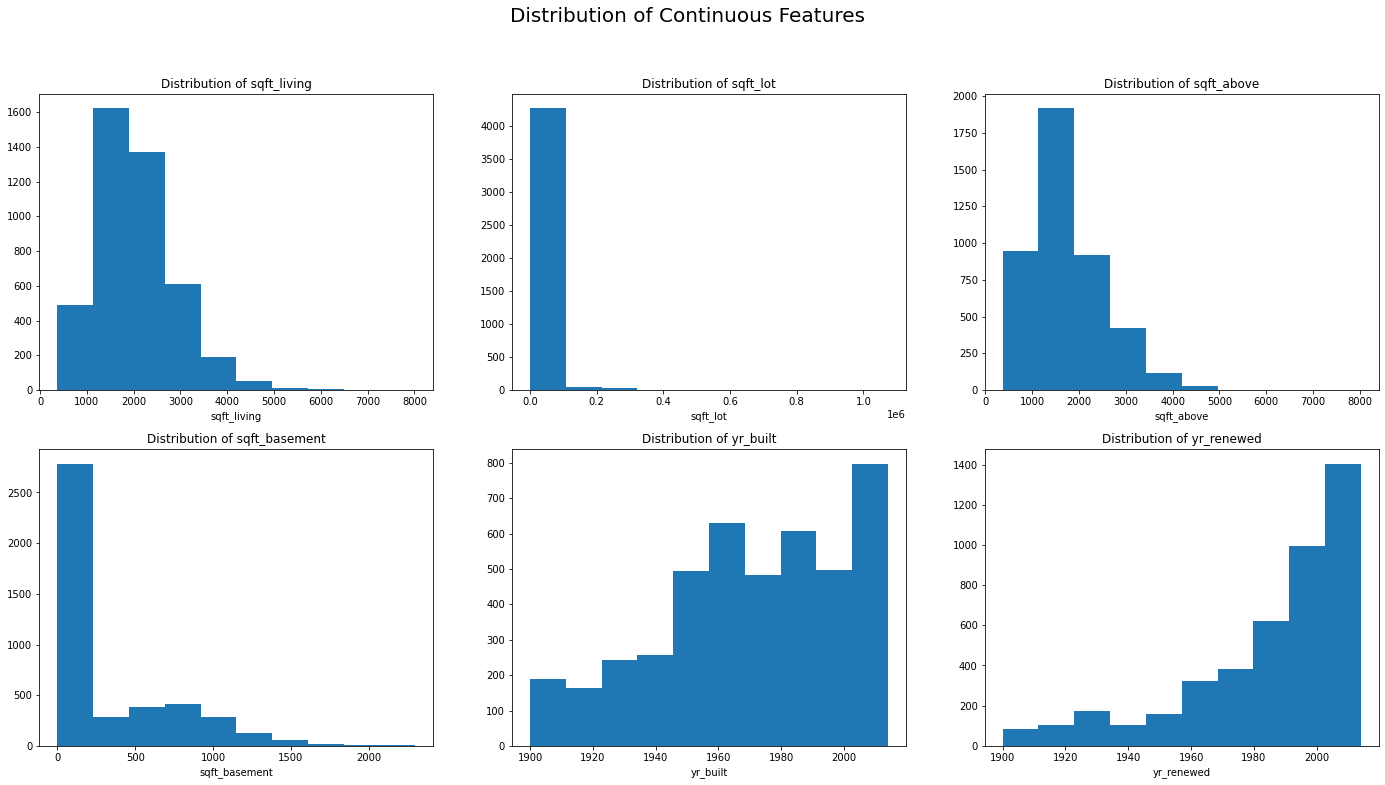

In [ ]:
fig, ax = plt.subplots(2,int(len(updated_continuous_features)/2), figsize=(24,12))
fig.suptitle('Distribution of Continuous Features', fontsize=20)
j = 0
k = 0
# loop to plot each feature dynamically
for i in range(len(continuous_features)):
  if(i == (len(continuous_features)/2)):
    j = 0
    k = 1
  # plotting continuous features
  ax[k,j].hist(updated_housing_df[updated_continuous_features[i]])
  ax[k,j].set_xlabel(updated_continuous_features[i])
  ax[k,j].set_title("Distribution of " + updated_continuous_features[i])
  j = j + 1

Visualize the dependency of the target on each continuous feature (2d scatter plot).

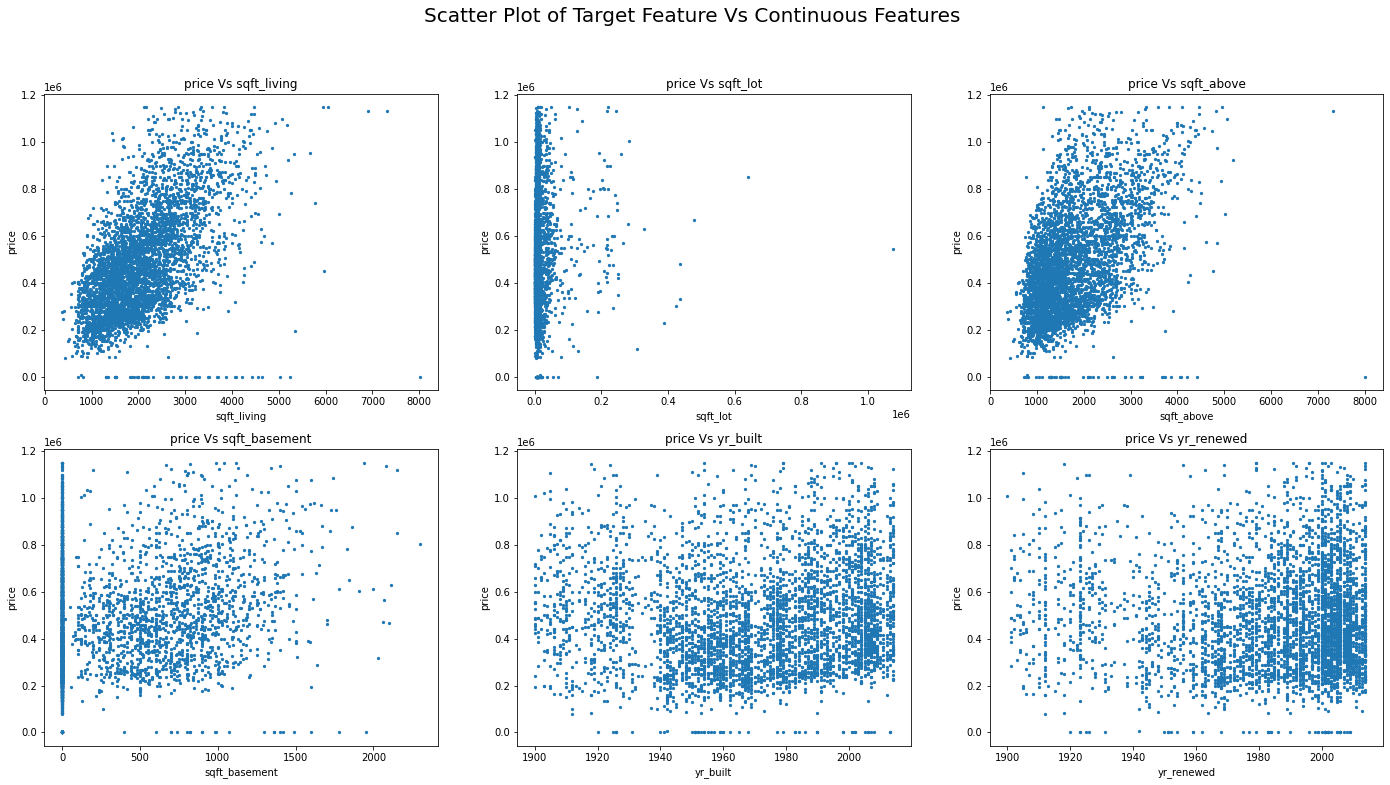

In [ ]:
fig, ax = plt.subplots(2,int(len(updated_continuous_features)/2), figsize=(24,12))
fig.suptitle('Scatter Plot of Target Feature Vs Continuous Features', fontsize=20)
j = 0
k = 0
# loop to plot each feature dynamically
for i in range(len(updated_continuous_features)):
  if(i == (len(updated_continuous_features)/2)):
    j = 0
    k = 1
  # plotting continuous feature and target
  ax[k,j].scatter(x=updated_housing_df[updated_continuous_features[i]],y=updated_housing_df['price'], s=5)
  column = updated_continuous_features[i]
  ax[k,j].set_title("price Vs " + column)
  ax[k,j].set_xlabel(updated_continuous_features[i])
  ax[k,j].set_ylabel('price')
  j = j + 1

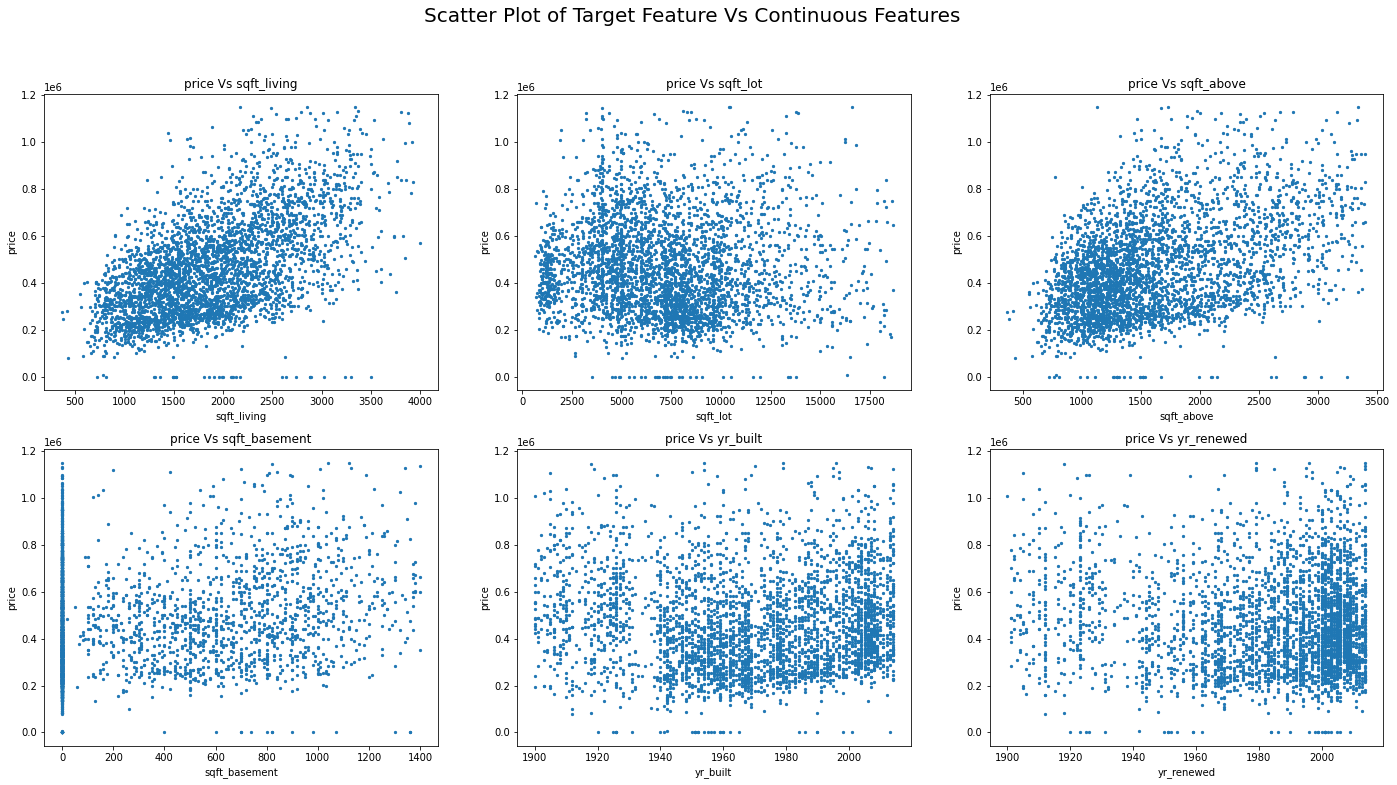

In [ ]:
columns=updated_continuous_features
for column in columns:
  updated_housing_df=Outliers_removal(updated_housing_df,column)

fig, ax = plt.subplots(2,int(len(updated_continuous_features)/2), figsize=(24,12))
fig.suptitle('Scatter Plot of Target Feature Vs Continuous Features', fontsize=20)
j = 0
k = 0
# loop to plot each feature dynamically
for i in range(len(updated_continuous_features)):
  if(i == (len(updated_continuous_features)/2)):
    j = 0
    k = 1
  # plotting continuous feature and target
  ax[k,j].scatter(x=updated_housing_df[updated_continuous_features[i]],y=updated_housing_df['price'], s=5)
  column = updated_continuous_features[i]
  ax[k,j].set_title("price Vs " + column)
  ax[k,j].set_xlabel(updated_continuous_features[i])
  ax[k,j].set_ylabel('price')
  j = j + 1

**Observations from the scatter plot:**
1. The variables sqft_above, sqft_basement,sqft_living are positively correlated with the target variable 'Price'. 
2. The variables sqft_basement has values concentrated in 0 as some houses won't have a basement.
3. The variable yr_built and yr_renewed is such that the data is scattered throughout.

Splitting the data in training and testing set. Use of ColumnTransformer to encode categorical variables.
Imputing missing values using SimpleImputer. Evaluating Linear Regression (OLS), Ridge, Lasso and
Elasticnet.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import linear_model

x = updated_housing_df.drop('price', axis=1)
y = updated_housing_df['price']

#splitting the data in training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=50, shuffle=True)

# encoding categorical variables
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
# imputing missing values
numeric_transformer_1 = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean"))]
)

# preprocessing features
preprocessor_1 = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, ['street','city','statezip','country']),
        ("num", numeric_transformer_1, ['sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renewed','bedrooms','bathrooms','floors','waterfront','view','condition']),
    ]
)

# Linear Regression (OLS)
clf_linearRegression = Pipeline(
    steps=[("preprocessor", preprocessor_1), ("classifier", linear_model.LinearRegression())]
)
clf_linearRegression.fit(x_train, y_train)
linearRegression_accuracy_1 = clf_linearRegression.score(x_test, y_test)

# Ridge
clf_ridge = Pipeline(
    steps=[("preprocessor", preprocessor_1), ("classifier", linear_model.Ridge(alpha=0.1))]
)
clf_ridge.fit(x_train, y_train)
ridge_accuracy_1 = clf_ridge.score(x_test, y_test)

# Lasso
clf_lasso = Pipeline(
    steps=[("preprocessor", preprocessor_1), ("classifier", linear_model.Lasso(alpha=0.1))]
)
clf_lasso.fit(x_train, y_train)
lasso_accuracy_1 = clf_lasso.score(x_test, y_test)

# ElasticNet
clf_elasticNet = Pipeline(
    steps=[("preprocessor", preprocessor_1), ("classifier", linear_model.ElasticNet(alpha=0.1, l1_ratio=0.7))]
)
clf_elasticNet.fit(x_train, y_train)
elasticNet_accuracy_1 = clf_elasticNet.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78746475012.02353, tolerance: 11723483322.123234
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23224864584748.094, tolerance: 11723483322.123234
  positive,


In [ ]:
# evaluating regression models without StandardScaler
numeric_transformer_2 = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)

preprocessor_2 = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("num", numeric_transformer_2, ['sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renewed','bedrooms','bathrooms','floors','waterfront','view','condition']),
    ]
)


print("Model\tAccuracy without Standard Scaling\tAccuracy with Standard Scaling")

# Linear Regression (OLS)
clf_linearRegression = Pipeline(
    steps=[("preprocessor", preprocessor_2), ("classifier", linear_model.LinearRegression())]
)
clf_linearRegression.fit(x_train, y_train)
linearRegression_accuracy_2 = clf_linearRegression.score(x_test, y_test)
linearRegression_result = ["Linear Regression", linearRegression_accuracy_1*100, linearRegression_accuracy_2*100]

# Ridge
clf_ridge = Pipeline(
    steps=[("preprocessor", preprocessor_2), ("classifier", linear_model.Ridge(alpha=0.1))]
)
clf_ridge.fit(x_train, y_train)
ridge_accuracy_2 = clf_ridge.score(x_test, y_test)
ridge_result = ["Ridge", ridge_accuracy_1*100, ridge_accuracy_2*100]

# Lasso
clf_lasso = Pipeline(
    steps=[("preprocessor", preprocessor_1), ("classifier", linear_model.Lasso(alpha=0.1))]
)
clf_lasso.fit(x_train, y_train)
lasso_accuracy_2 = clf_lasso.score(x_test, y_test)
lasso_result = ["Lasso", lasso_accuracy_1*100, lasso_accuracy_2*100]

# ElasticNet
clf_elasticNet = Pipeline(
    steps=[("preprocessor", preprocessor_1), ("classifier", linear_model.ElasticNet(alpha=0.1, l1_ratio=0.7))]
)
clf_elasticNet.fit(x_train, y_train)
elasticNet_accuracy_2 = clf_elasticNet.score(x_test, y_test)
elasticNet_result = ["Elasticnet", elasticNet_accuracy_1*100, elasticNet_accuracy_2*100]

Model	Accuracy without Standard Scaling	Accuracy with Standard Scaling


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78746475012.02353, tolerance: 11723483322.123234
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23224864584748.094, tolerance: 11723483322.123234
  positive,


In [ ]:
from tabulate import tabulate
results_header = ['Model', 'Accuracy without Scaling', 'Accuracy with Scaling']
print(tabulate([linearRegression_result, ridge_result, lasso_result, elasticNet_result], headers=results_header))

Model                Accuracy without Scaling    Accuracy with Scaling
-----------------  --------------------------  -----------------------
Linear Regression                     67.0184                  35.1292
Ridge                                 72.3756                  73.3289
Lasso                                 68.2829                  68.2829
Elasticnet                            63.9143                  63.9143


From the above set of scores we can conclude that StandardScaler in this scenario drastically reduces the accuracy of Linear Regression and Ridge model. On the other hand for Ridge there is a minute change in the accuracy. Whereas, for Lasso and Elasticnet models the score stays same. Out of all the Regression models Ridge produces highest score of 77.3% without scaling and 76.5% with scaling.

Hence, we will predict the prices using Ridge Regression model in which we will not be using StandardScaler.